**Author: Alvaro Zambrana Sejas**

**Módulo Machine Learning**

In [190]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [191]:

import pandas as pd
import sys
import os

# Add the src directory to the Python path
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))

if src_path not in sys.path:
    sys.path.append(src_path)

In [192]:
import sys

# Descripción

El conjunto de datos de la flor de iris es un conjunto específico de información compilada por el biólogo Ronald Fisher en la década de 1930. Describe características biológicas particulares de varios tipos de flores de iris, específicamente, la longitud y el ancho de los pétalos y los sépalos, que forman parte del sistema reproductivo de la flor.

| Iris Setosa                                                                      | Iris Virginica                                                                 | Iris Versicolor                                                                 |
|----------------------------------------------------------------------------------|--------------------------------------------------------------------------------|---------------------------------------------------------------------------------|
| <img src="../assets/Iris_setosa.jpg" alt="image" width="300" height="auto">      | <img src="../assets/Iris_virginica.jpg" alt="image" width="300" height="auto"> | <img src="../assets/Iris_versicolor.jpg" alt="image" width="300" height="auto"> |
| Fuente: [Iris Setosa](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris) | Fuente: [Iris Virginica](https://es.wikipedia.org/wiki/Iris_virginica)         | Fuente: [Iris Versicolor](https://es.wikipedia.org/wiki/Iris_versicolor)        |


In [193]:
if 'google.colab' in sys.modules:
    print("Ejecutando en Google Colab")
    from google.colab import drive
    !git clone https://github.com/azambrana/iris.git
    drive.mount('/content/iris', force_remount=True)
    data_path = 'https://raw.githubusercontent.com/azambrana/iris/master/data/Iris.csv'
else:
    data_path = '../data/Iris.csv'
    print("Ejecutando localmente")

Ejecutando localmente


# Objetivo

El objetivo de este notebook es realizar un análisis exploratorio de los datos (AED) del dataset Iris y aplicar modelos de clasificación para predecir la especie de la flor Iris.

In [194]:
# Cargamos el Dataset
import pandas as pd
df = pd.read_csv(data_path)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [195]:
# Revisamos si existen valores faltantes
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [196]:
# Remover valores únicos
df.drop(['Id'], axis=1, inplace=True)

In [197]:
# características seleccionadas
features = df.columns[:-1]

# característica objetivo
target_feature = 'Species'

# Análisis Exploratorio de Datos (AED)

En esta sección se realizará un análisis exploratorio de los datos para entender la distribución de los datos y la relación entre las variables.

In [198]:
df.groupby(target_feature).describe(include="all").T

Species              Iris-setosa  Iris-versicolor  Iris-virginica
SepalLengthCm count    50.000000        50.000000       50.000000
              mean      5.006000         5.936000        6.588000
              std       0.352490         0.516171        0.635880
              min       4.300000         4.900000        4.900000
              25%       4.800000         5.600000        6.225000
              50%       5.000000         5.900000        6.500000
              75%       5.200000         6.300000        6.900000
              max       5.800000         7.000000        7.900000
SepalWidthCm  count    50.000000        50.000000       50.000000
              mean      3.418000         2.770000        2.974000
              std       0.381024         0.313798        0.322497
              min       2.300000         2.000000        2.200000
              25%       3.125000         2.525000        2.800000
              50%       3.400000         2.800000        3.000000
              75%       3.675000         3.000000        3.175000
              max       4.400000         3.400000        3.800000
PetalLengthCm count    50.000000        50.000000       50.000000
              mean      1.464000         4.260000        5.552000
              std       0.173511         0.469911        0.551895
              min       1.000000         3.000000        4.500000
              25%       1.400000         4.000000        5.100000
              50%       1.500000         4.350000        5.550000
              75%       1.575000         4.600000        5.875000
              max       1.900000         5.100000        6.900000
PetalWidthCm  count    50.000000        50.000000       50.000000
              mean      0.244000         1.326000        2.026000
              std       0.107210         0.197753        0.274650
              min       0.100000         1.000000        1.400000
              25%       0.200000         1.200000        1.800000
              50%       0.200000         1.300000        2.000000
              75%       0.300000         1.500000        2.300000
              max       0.600000         1.800000        2.500000

In [199]:
# Todos los features son númericos
# Obtener valores descriptivos
df[features].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [200]:
# Resumen del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Análisis Univariado


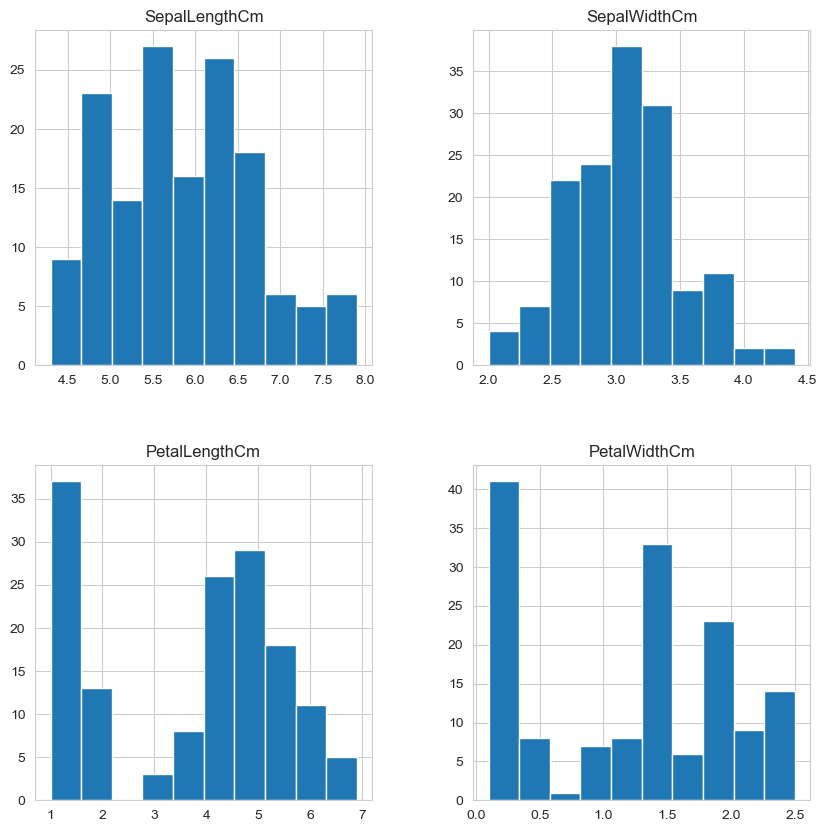

In [201]:
# Histograma
import matplotlib.pyplot as plt

df[features].hist(figsize=(10,10))

plt.show()

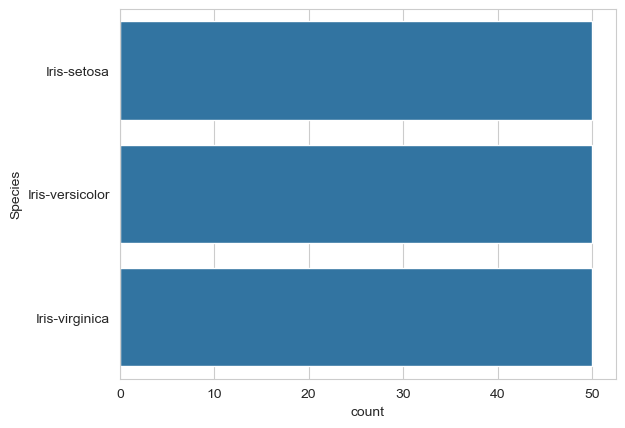

In [202]:
# countplot

import seaborn as sns

sns.countplot(df[target_feature])

plt.show()

Hay 50 muestras de cada especie de flor Iris.  Por lo tanto, el dataset está balanceado.

## Análisis Bivariado

<Figure size 1000x1000 with 0 Axes>

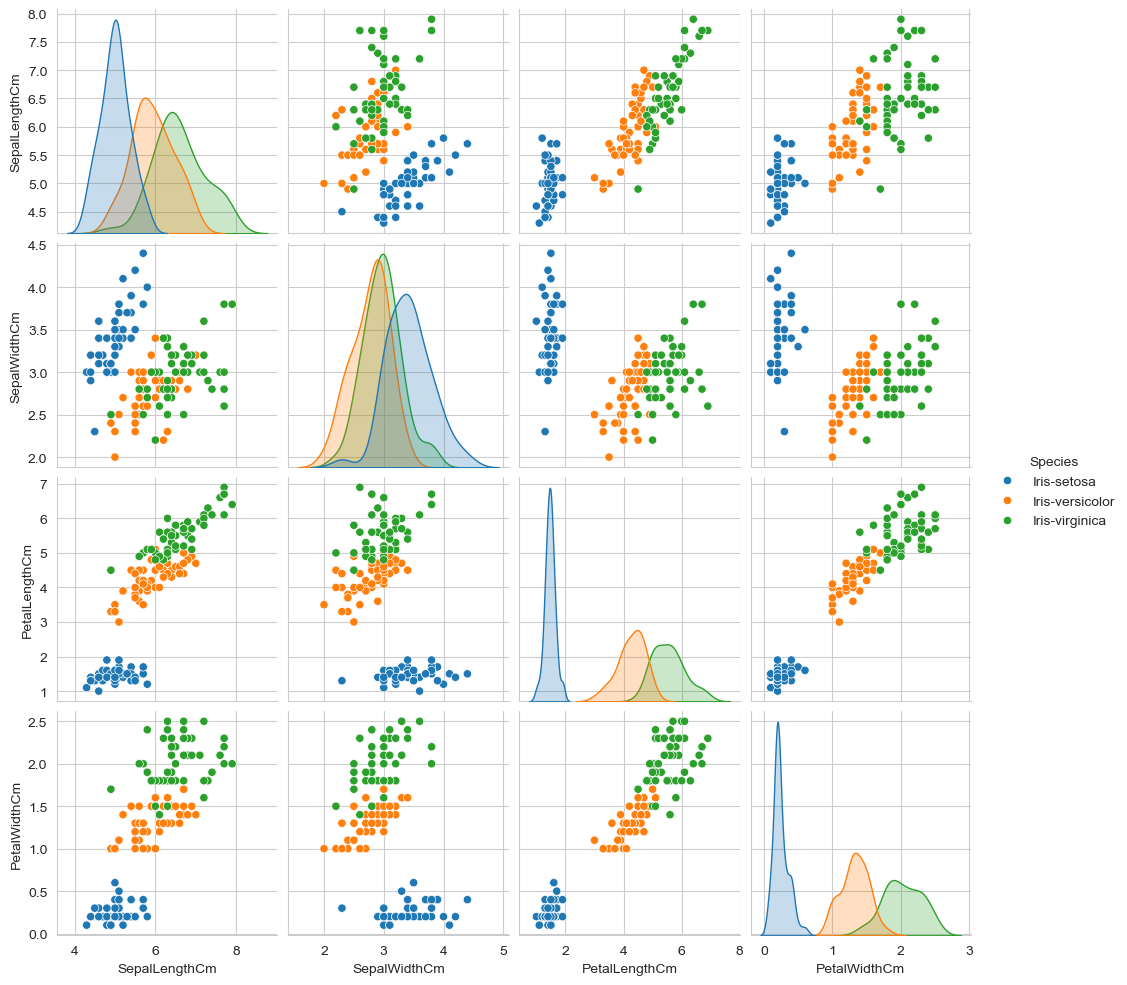

In [203]:
# pairplot

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

plt.figure(figsize=(10,10))

sns.pairplot(df, hue=target_feature)

plt.show()

Iris Setosa (Azul) es claramente distinguible de las otras dos especies en todas las combinaciones de características. Iris Versicolor y Iris Virginica tienen una superposición significativa en todas las combinaciones de características, especialmente en las dimensiones del sépalo.

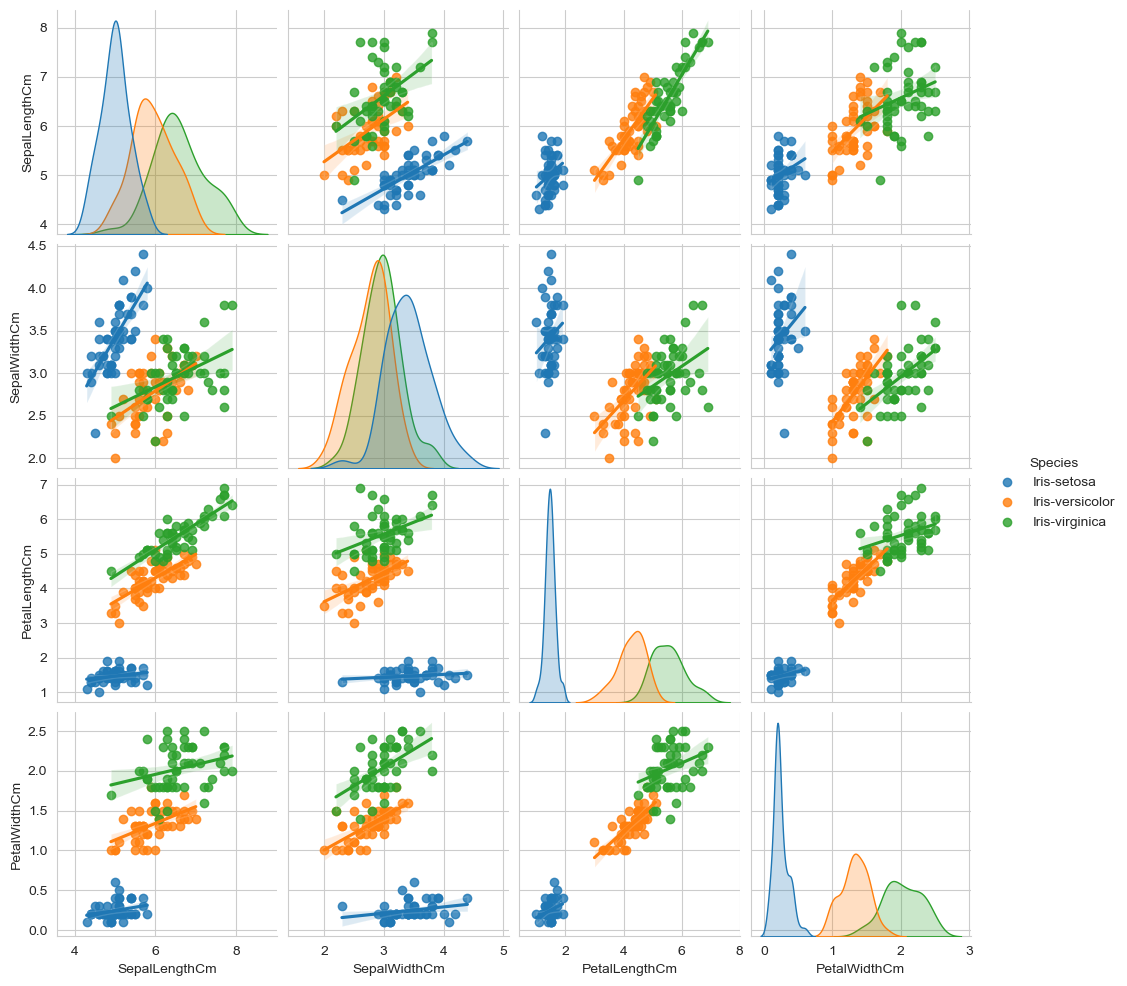

In [204]:
sns.pairplot(df, hue=target_feature, kind='reg')

plt.show()

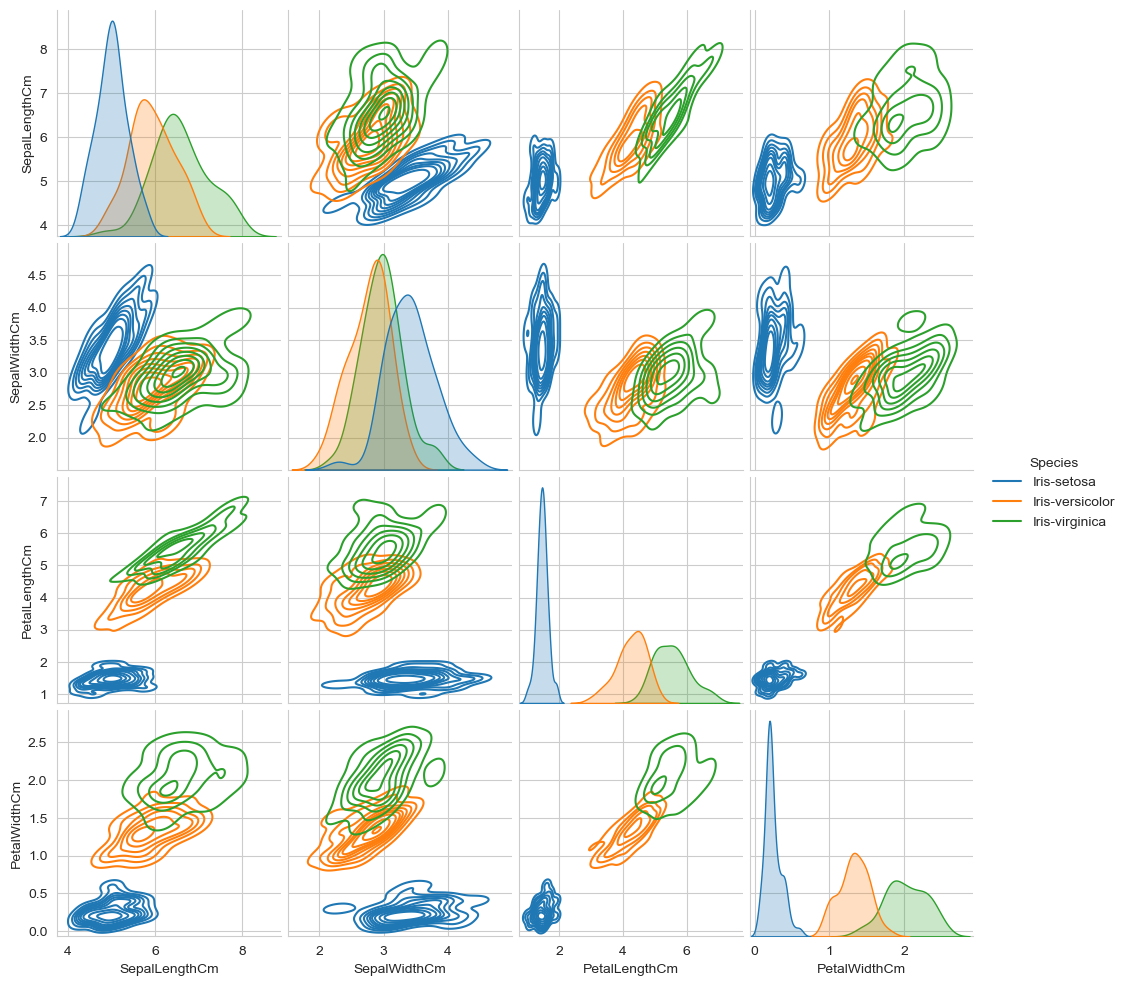

In [205]:
sns.pairplot(df, hue=target_feature, kind='kde')

plt.show()

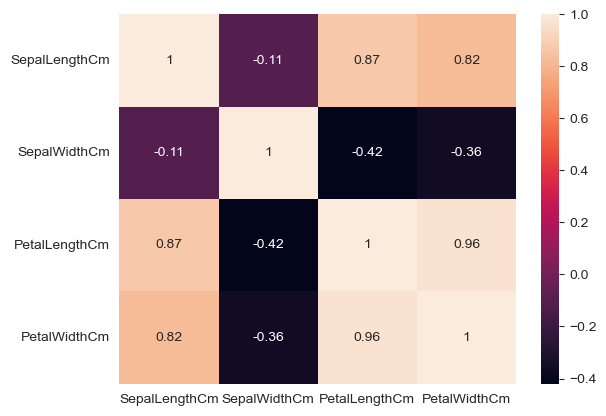

In [206]:
# draw matrix correlation

sns.heatmap(df.drop([target_feature], axis=1).corr(), annot=True)

plt.show()

Las características PetalLengthCm y PetalWidthCm tienen una fuerte correlación positiva. SepalLengthCm y SepalWidthCm tienen una correlación positiva moderada.

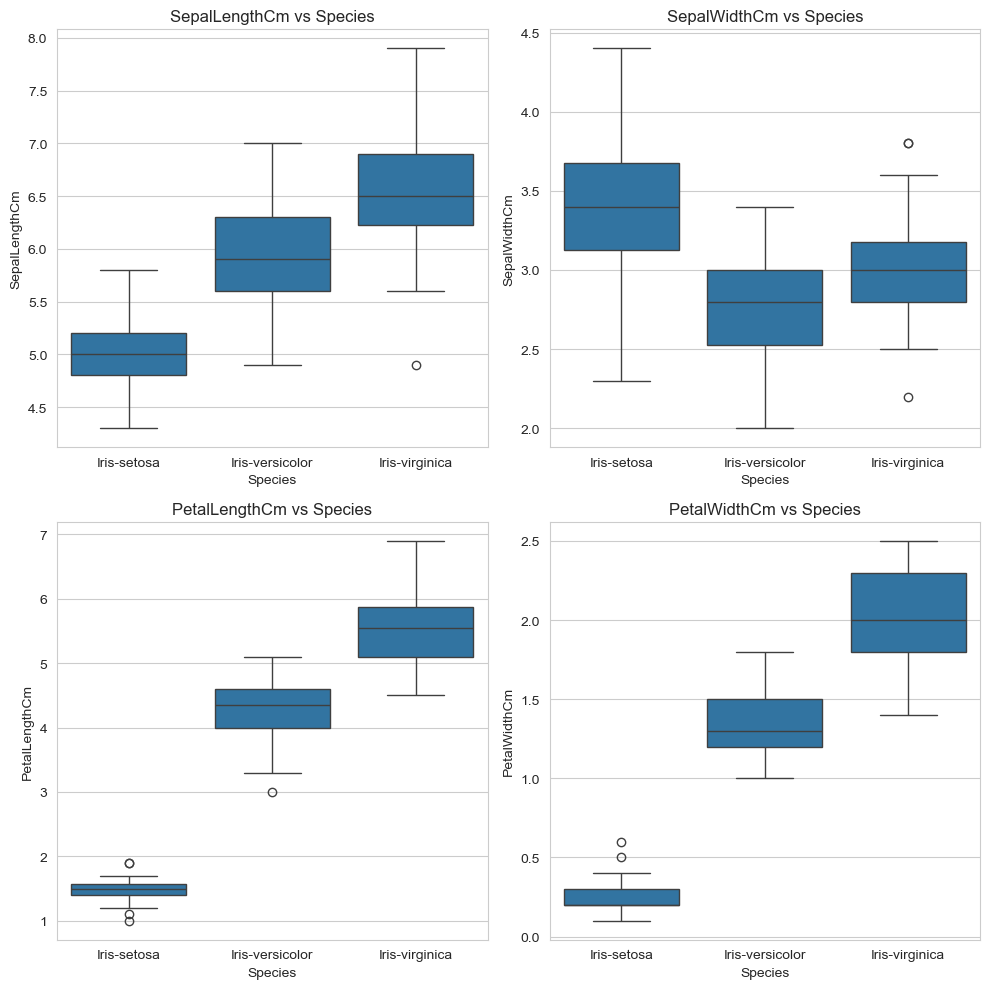

In [207]:
# boxplot

plt.figure(figsize=(10,10))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=target_feature, y=feature, data=df)
    plt.title(f'{feature} vs {target_feature}')
    
plt.tight_layout()


No se observan valores atípicos importantes en los datos.

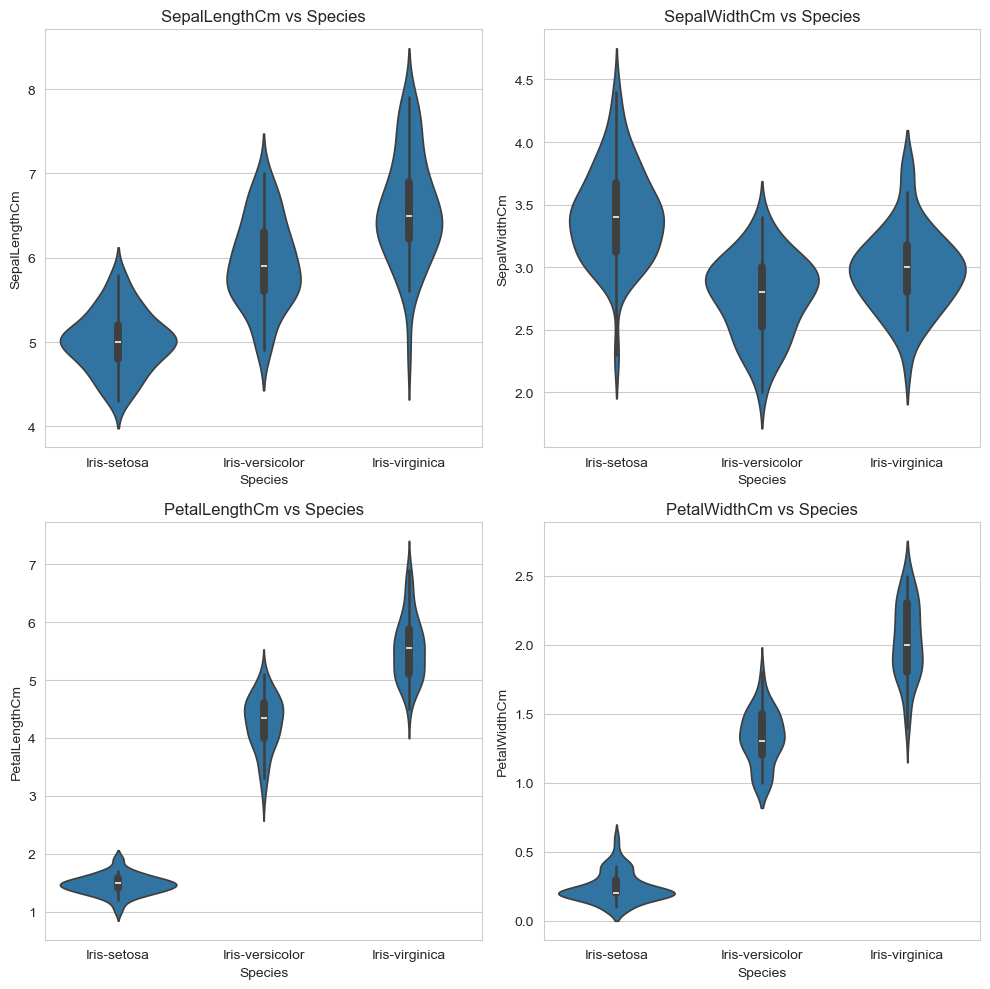

In [208]:
# violinplot

plt.figure(figsize=(10,10))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x=target_feature, y=feature, data=df)
    plt.title(f'{feature} vs {target_feature}')
    
plt.tight_layout()

In [209]:
# Existen Outlier, se puede aplicar un filtro para removerlos
IRQ = df[features].quantile(0.75) - df[features].quantile(0.25)

lower_bound = df[features].quantile(0.25) - 1.5 * IRQ
upper_bound = df[features].quantile(0.75) + 1.5 * IRQ

df_no_outliers = df[(df[features] >= lower_bound) & (df[features] <= upper_bound)]

# merge with target feature

df_no_outliers = pd.concat([df_no_outliers, df[target_feature]], axis=1)

df_no_outliers.reset_index(drop=True, inplace=True)
if df.shape[0] == df_no_outliers.shape[0]:
    print('No se eliminaron valores atípicos')

No se eliminaron valores atípicos


## Análisis Multivariado

In [210]:
# interactive scatter3D
!pip install plotly

import plotly.express as px

fig = px.scatter_3d(df, x='SepalLengthCm', y='SepalWidthCm', z='PetalLengthCm', color='Species')

# size
fig.update_traces(marker=dict(size=5))

# resize figure
fig.update_layout(width=800, height=800)

fig.update_layout(scene=dict(xaxis_title='Sepal Length (cm)', yaxis_title='Sepal Width (cm)', zaxis_title='Petal Length (cm)'))

fig.show()

# Modelos de Clasificación

In [211]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
lr = LogisticRegression()
svm = SVC()

models = [dt, rf, lr, svm]

In [212]:
X = df.drop([target_feature], axis=1)
y = df[target_feature]

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #  , random_state=42

In [214]:
for model in models:
    model.fit(X_train, y_train)
    print(f'{model.__class__.__name__} score: {model.score(X_test, y_test)}')

DecisionTreeClassifier score: 0.9333333333333333
RandomForestClassifier score: 0.9333333333333333
LogisticRegression score: 0.9666666666666667
SVC score: 0.9666666666666667


DecisionTreeClassifier - Matriz de Confusión


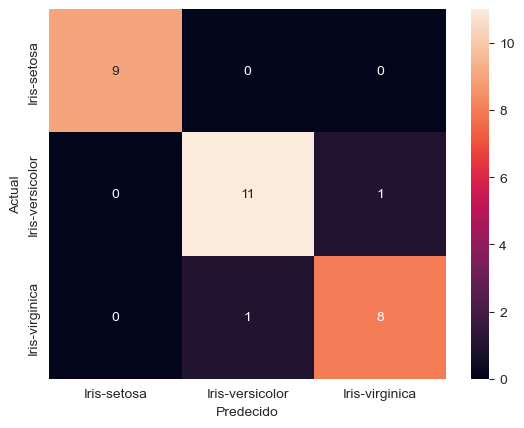

DecisionTreeClassifier - Reporte de Clasificación
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30

RandomForestClassifier - Matriz de Confusión


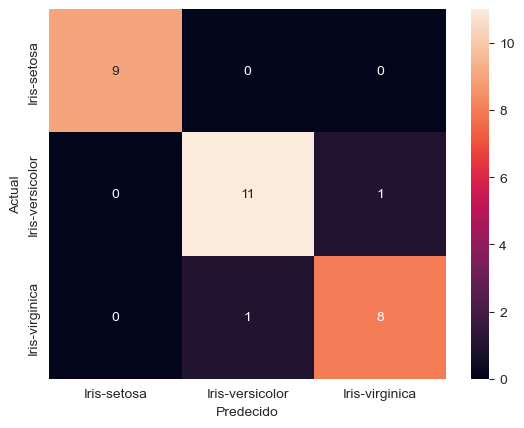

RandomForestClassifier - Reporte de Clasificación
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30

LogisticRegression - Matriz de Confusión


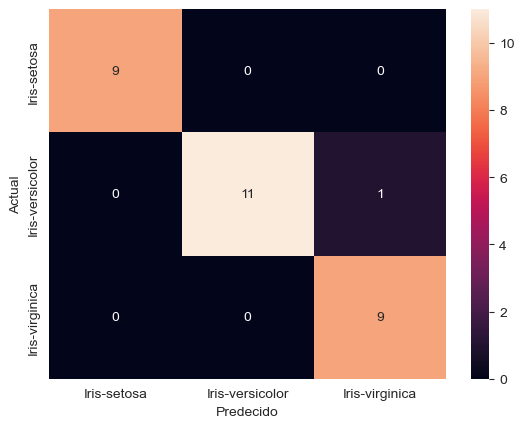

LogisticRegression - Reporte de Clasificación
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

SVC - Matriz de Confusión


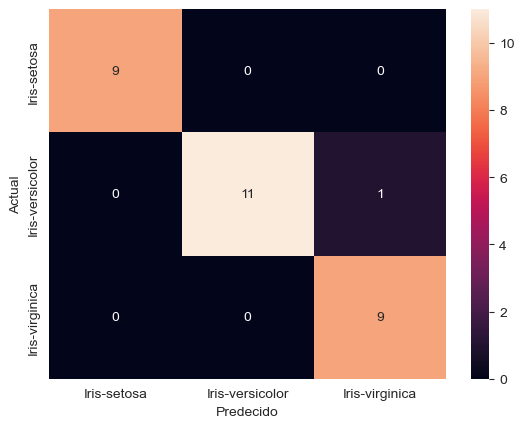

SVC - Reporte de Clasificación
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [215]:
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predecido')
    plt.ylabel('Actual')
    plt.show()
    

for model in models:
    y_predict = model.predict(X_test)
    print(f'{model.__class__.__name__} - Matriz de Confusión')
    plot_confusion_matrix(y_test, y_predict, y.unique())    
    print(f'{model.__class__.__name__} - Reporte de Clasificación')
    print(classification_report(y_test, y_predict))   

In [216]:
# Feature importance

for model in [rf, dt]:    
    print(f'{model.__class__.__name__} feature importance')
    print(pd.Series(model.feature_importances_, index=features).sort_values(ascending=False))
    

RandomForestClassifier feature importance
PetalWidthCm     0.493398
PetalLengthCm    0.390125
SepalLengthCm    0.101596
SepalWidthCm     0.014880
dtype: float64
DecisionTreeClassifier feature importance
PetalWidthCm     0.897192
PetalLengthCm    0.073623
SepalLengthCm    0.016677
SepalWidthCm     0.012508
dtype: float64
